## Importing the packages

In [163]:
#Importing Packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import cluster
from sklearn.cluster import KMeans

## Reading the data

In [164]:
df = pd.read_csv('diabetic_data.csv',header=0)#Read the File
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [165]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Feature Engineering

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [167]:
df.isnull().values.any() #Checking null values, if any

False

In [168]:
df.drop_duplicates() #Checking duplicate values, if any

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [169]:
df = df.drop(['medical_specialty','payer_code','weight'],axis=1) #drop columns, which has missing data values

In [170]:
df['race']=df.race.replace('?',np.nan) #replace ? with nan
df['race'].fillna(df['race'].mode()[0], inplace=True)#replace nan values with 0

In [171]:
df.race.isnull().sum() #Check whether data consist of any null values 

0

In [172]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [173]:
#Removing all the drug columns
df = df.drop(['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1)

In [174]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [175]:
df.describe()#describes the dataset

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [176]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Problem Statement

Using the diabetic.csv on US 130 hospitals data of ten years, tried to find out patients encouter data based on emergency, inpatient, outpatient using these three variables in the dataset:

1.Number of inpatient visits (Variable Name -number_inpatient)

2.Number of outpatient visits (Variable_name -number_outpatient)

3.Number of emergency visits of the patient in the year (Variable Name - number_emergency)



In [177]:
kmeans = KMeans(n_clusters=2)
#creating a dataframe for clustering 
cluster_data = df[['number_emergency','number_inpatient','number_outpatient']] 
cluster_data

,number_emergency,number_inpatient,number_outpatient
0,0,0,0
1,0,0,0
2,0,1,2
3,0,0,0
4,0,0,0
...,...,...,...
101761,0,0,0
101762,0,1,0
101763,0,0,1
101764,0,1,0


In [178]:
kmeans_model.cluster_centers_ #Finding the centroid

array([[ 0.1042966 ,  0.21648491,  0.07918885],
       [ 5.1706387 ,  6.48141087,  0.92183031],
       [ 0.32725707,  0.65594948,  3.06832209],
       [ 0.30455616,  2.85884837,  0.24924876],
       [ 0.50214592,  1.24463519, 12.36695279]])

## Cluster Labels

In [179]:
#generate labels by using the method labels_ This generates a numpy array 
label_array = kmeans_model.labels_
print(label_array)

#just to avoid any issues later in processing use the astype() method of array to convert the data type to integer
#store them as labels
label_integer = label_array.astype(int) 
print(label_integer)

# converting the labels in to a dataframe and naming the column as Cluster 
cluster_labels = pd.DataFrame(label_integer, columns = ['Clusters'])
cluster_labels

[0 0 2 ... 0 0 0]
[0 0 2 ... 0 0 0]


,Clusters
0,0
1,0
2,2
3,0
4,0
...,...
101761,0
101762,0
101763,0
101764,0


##  Visualization of Clustering Result in 3D Plot

In [180]:
scatter_data = cluster_data.join(cluster_labels) 
scatter_data.head()

,number_emergency,number_inpatient,number_outpatient,Clusters
0,0,0,0,0
1,0,0,0,0
2,0,1,2,2
3,0,0,0,0
4,0,0,0,0


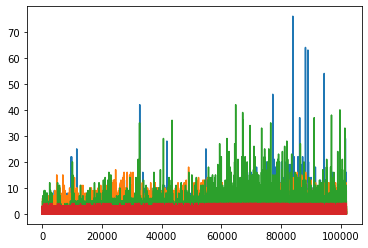

In [181]:
plt.plot(scatter_data)

In [182]:
scatter_data['Clusters'].unique()

array([0, 2, 3, 4, 1])

In [183]:
scatter_data['Clusters'].value_counts()

0    80971
3    12313
2     6967
1     1049
4      466
Name: Clusters, dtype: int64

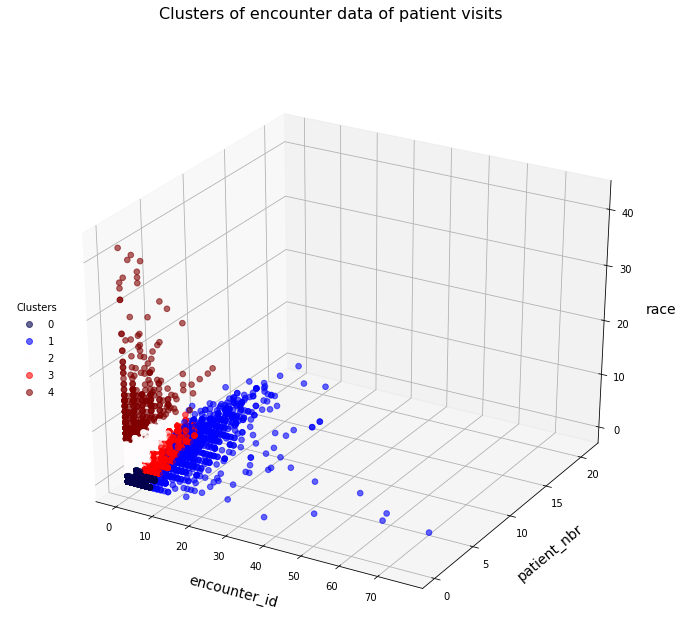

In [184]:
# 3D Scatter plots with legend 
from mpl_toolkits.mplot3d import Axes3D

plt.close('all') #sanity statement for closing all existing plots 
fig, ax3 = plt.subplots(figsize=(12, 10), subplot_kw = {'projection': '3d'})

# giving title to the figure using the method suptitle for Figure object fig
fig.suptitle("Clusters of encounter data of patient visits", fontsize=16) 

#extracting the columns and converting into arrays for no hassles in processing later
x = np.array(scatter_data.loc[:, 'number_emergency'])
y = np.array(scatter_data.loc[:, 'number_inpatient'])
z = np.array(scatter_data.loc[:, 'number_outpatient'])
cluster_color_code = np.array(scatter_data.loc[:, "Clusters"])

# Create only one scatter plot object and save it as scatter_plot. 
# Argument c: pass the array which will be categorical and categories denoted by numbers. These will be used to color code. 
# Argument cmap: I am adding color choice by argument cmap. Recall we used it in Seaborn too in Week 12
# You can find a list of color maps here - https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html
# Argument s: allows us to control for the size of dot/point. 
# Argument alpha: controls the opacity

scatter_plot = ax3.scatter(x, y, z, c=cluster_color_code, cmap='seismic', s=10**1.5, alpha =0.6)

# Creating the legend. Calling the method legend of the Axes object
# Argument 1 - legend element of the scatter plot object that we saved 
# use * before the name of the method as in - *scatter_plot.legend_elements() to unpack the values returned by the 
# legend_elements() method and not the object. If you remove * you will instead of legend there are some object information 
# printed across the graph
# Argument 2: location of legend 
# Argument 3: title of the legend
# You can read more about the legend here - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.legend.html

ax3.legend(*scatter_plot.legend_elements(), loc="center left",
              title="Clusters", frameon=False)

# Managing the aesthetics
ax3.set_xlabel(df.columns[0], fontsize=14)
ax3.set_ylabel(df.columns[1], fontsize=14)
ax3.set_zlabel(df.columns[2], fontsize=14)
ax3.xaxis.labelpad = 15
ax3.yaxis.labelpad = 15
ax3.zaxis.labelpad = 15

plt.show()